@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# HR Analytics Project- Understanding the Attrition in HR

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.


#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

 

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [107]:
#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Extracting Data

In [163]:
data = pd.read_csv(r'C:\Users\91977\DataScienceProjects\DatatrainedProjects\EvaluationProjects\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [164]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
#To check our dataset dimensions

data.shape

(1470, 35)

- Our dataset contains 1470 Rows and 35 Columns
- It means we have the data of 1470 employees

In [5]:
#Check data column names

data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data['EmployeeNumber'].unique

<bound method Series.unique of 0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64>

In [403]:
#We could see this is the employee number which doesn't effect our dataset model building, hence let us remove it

data = data.drop(columns = 'EmployeeNumber')

### Checking the DataTypes of each Column

In [8]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

- There are 9 Categorical columns and 26 integer columns

#### Categorical Columns:

- `Attrition`

- `BusinessTravel`

- `Department`

- `EducationField`

- `Gender`

- `JobRole`

- `MaritalStatus`

- `Over18`

- `OverTime`

### Treating Missing Values

In [9]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

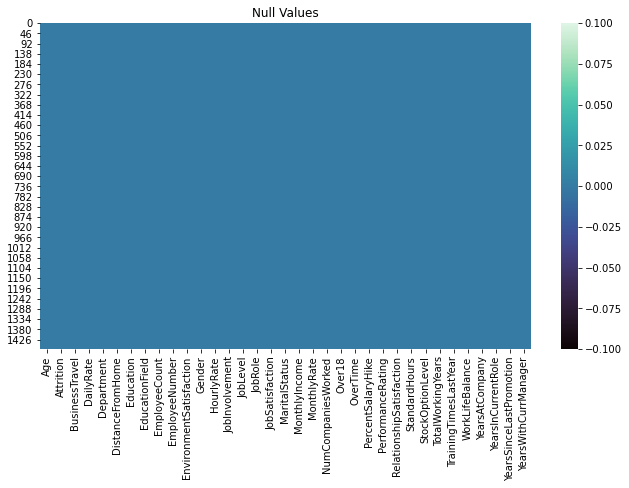

In [11]:
#Let's visualize to check the nullvalues in our dataset

plt.figure(figsize = [11,6])
sns.heatmap(data.isnull(),cmap = 'mako')
plt.title('Null Values')
plt.show()

- We observe that our dataset doesn't have any null values

### Focusing on Features and Labels

In [13]:
data.columns   #Check all the column names

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##### Our dataset is a combination of Categorical and integer columns

- `Attrition of the employees, is our Target Variable with values either 'Yes' or 'No'.` 

## Exploratory Data Analysis

Let's visualize our variable columns

### Univariate Analysis

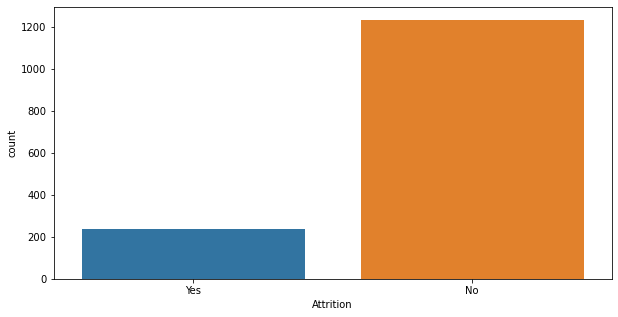

In [29]:
plt.figure(figsize = [10,5])
sns.countplot(x='Attrition',data=data)
plt.show()

#### Observation:
- We observe, that there is high Attrition of employees

- Here, the number of observations belonging to `NO` Category is very high when compared to the number of observations in `Yes` Category.


- We need to handle this difference by using `Over-Sampling (or) Under-Sampling technique`, we will perform it later

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

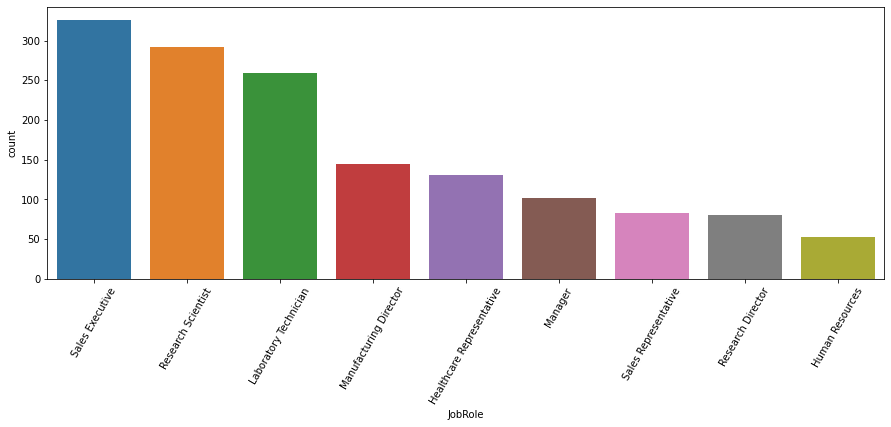

In [45]:
plt.figure(figsize = [15,5])

sns.countplot(x='JobRole',data=data)
plt.xticks(rotation=60)

Observation:
    - Most of the empolyees works as a "Sales Executive"
    - We have least number of employees working in "Human Resources"

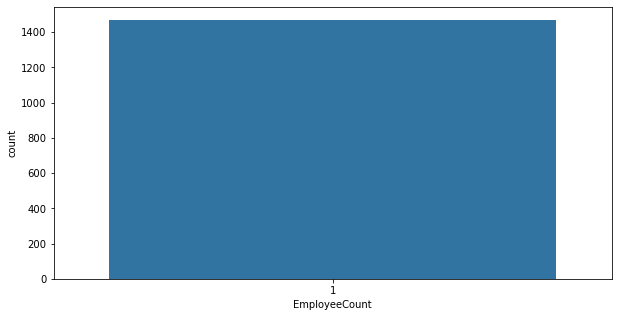

In [15]:
plt.figure(figsize = [10,5])
sns.countplot(x='EmployeeCount',data=data)
plt.show()

- The employee count must be 1 for each employee, we can remove this column while building the model

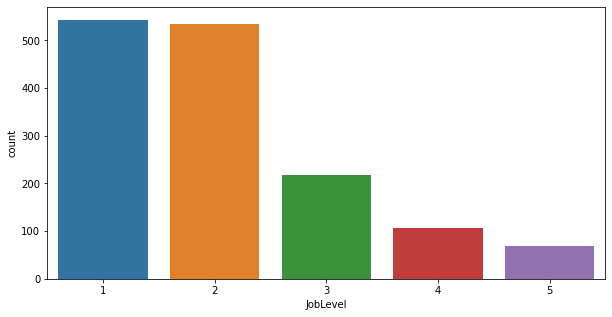

In [16]:
plt.figure(figsize = [10,5])
sns.countplot(x='JobLevel',data=data)
plt.show()

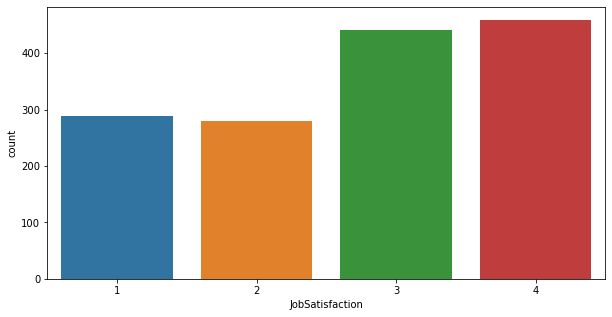

In [17]:
plt.figure(figsize = [10,5])
sns.countplot(x='JobSatisfaction',data=data)
plt.show()

- We could see that most of the employees rates Job Satisfaction as "4"
- But again there are nearly about 300 employees who rates Job Satisfaction as "1" and nearly about 295 employees who rates Job Satisfaction as "2"

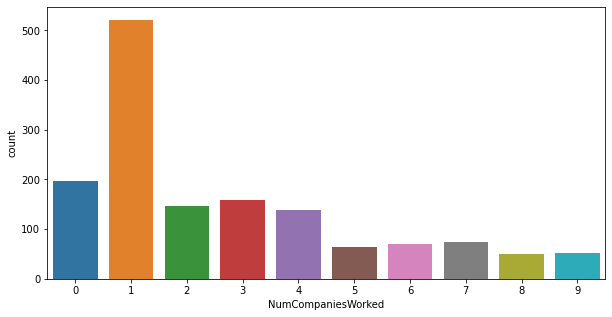

In [18]:
plt.figure(figsize = [10,5])
sns.countplot(x='NumCompaniesWorked',data=data)
plt.show()

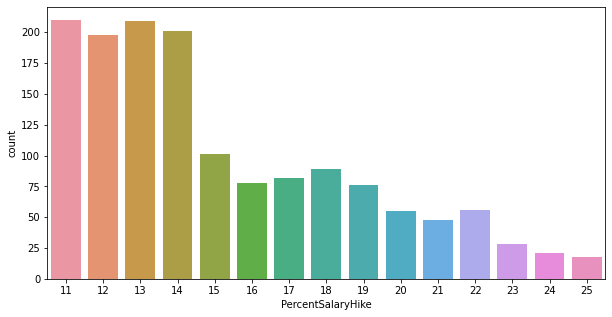

In [19]:
plt.figure(figsize = [10,5])
sns.countplot(x='PercentSalaryHike',data=data)
plt.show()

- The highest Percentage of the Salary Hike for most of the employees is "11%"
- Very least number of employees have received the Salary hike with "25 Percent"

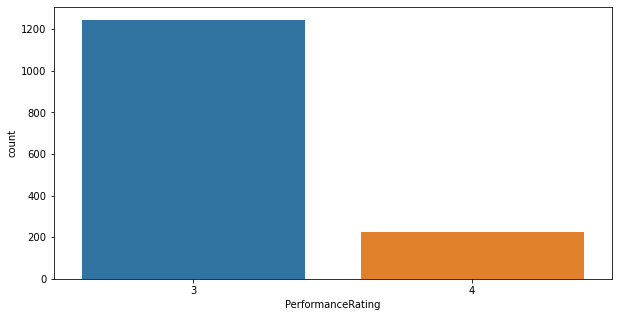

In [20]:
plt.figure(figsize = [10,5])
sns.countplot(x='PerformanceRating',data=data)
plt.show()

- Here, we notice that most of the employees performace Ratings are at score "3"

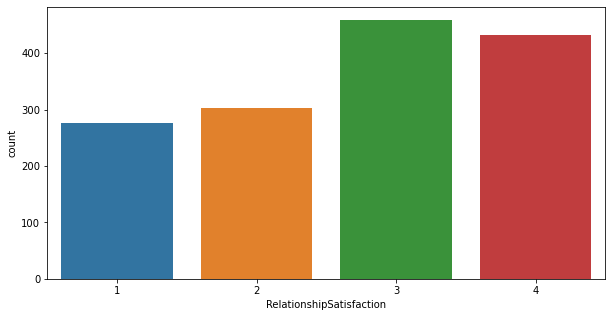

In [21]:
plt.figure(figsize = [10,5])
sns.countplot(x='RelationshipSatisfaction',data=data)
plt.show()

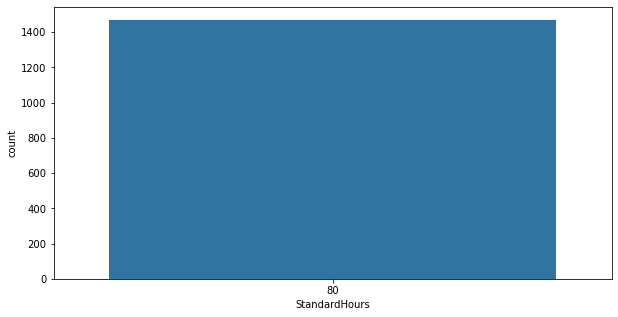

In [22]:
plt.figure(figsize = [10,5])
sns.countplot(x='StandardHours',data=data)
plt.show()

- Here, for all the employees the "Standard Hours" is "80"
- As it contains the same data value in the complete column, so, we can remove this variable from our model

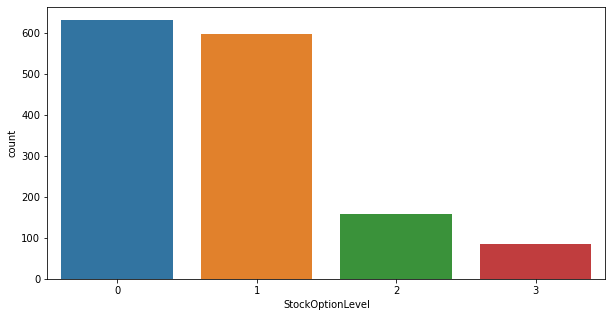

In [23]:
plt.figure(figsize = [10,5])
sns.countplot(x='StockOptionLevel',data=data)
plt.show()

- Here, for many of the employees the "Stock Option Level" is 'Zero', it means many of the employees are not given the Stock option
- Less than 100 employees have given with "Stock Option Level" as "3"(the highest level)

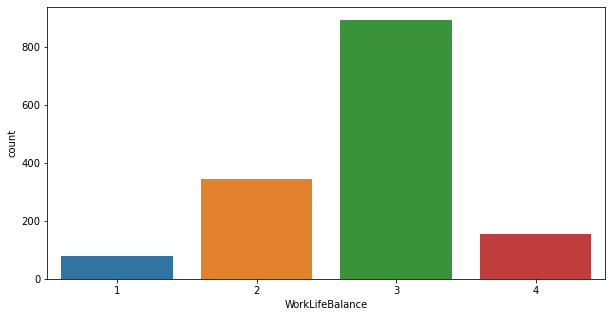

In [24]:
plt.figure(figsize = [10,5])
sns.countplot(x='WorkLifeBalance',data=data)
plt.show()

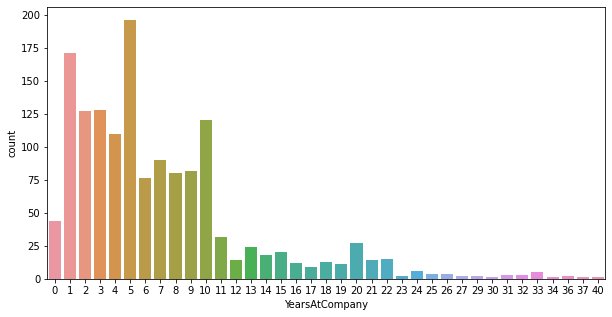

In [25]:
plt.figure(figsize = [10,5])
sns.countplot(x='YearsAtCompany',data=data)
plt.show()

- There are nearly about 180-198 employees who has worked with the same company for 5 years

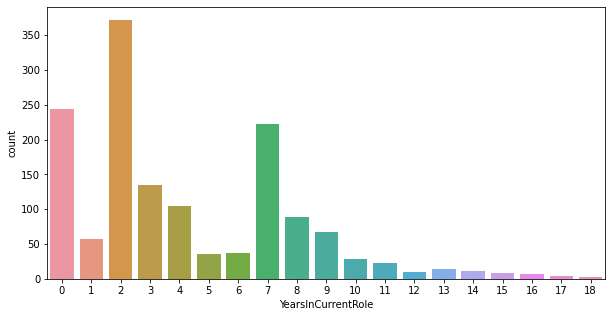

In [26]:
plt.figure(figsize = [10,5])
sns.countplot(x='YearsInCurrentRole',data=data)
plt.show()

- We notice that there are more than 350 employees who has worked in the same current role for 2 years

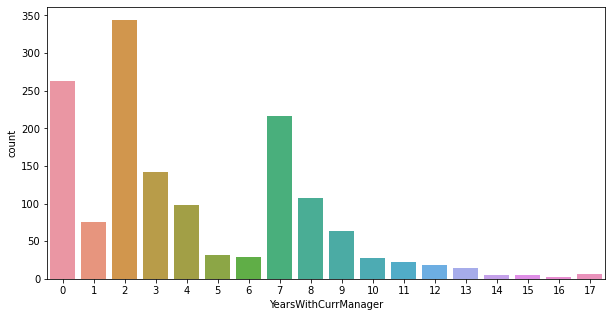

In [27]:
plt.figure(figsize = [10,5])
sns.countplot(x='YearsWithCurrManager',data=data)
plt.show()

<AxesSubplot:>

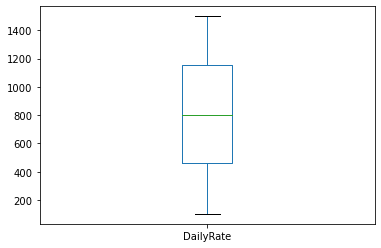

In [28]:
#Let's visualize using boxplot

data['DailyRate'].plot.box() 

- No outliers in column "DailyRate"

<AxesSubplot:>

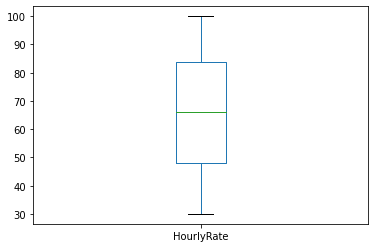

In [29]:
data['HourlyRate'].plot.box()

- No outliers in column "HourlyRate"

<AxesSubplot:>

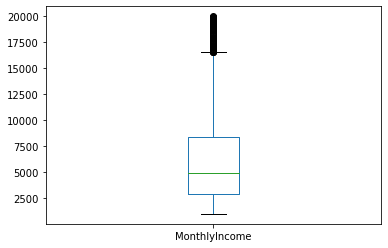

In [30]:
data['MonthlyIncome'].plot.box()

- Outlier found in 'MonthlyIncome' Variable, We shall remove it later

<AxesSubplot:>

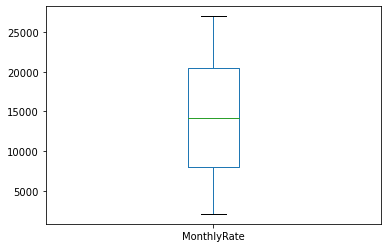

In [31]:
data['MonthlyRate'].plot.box()

- No outliers in column "MonthlyRate"

### Bivariate Analysis

Text(0.5, 0, 'Marital Status')

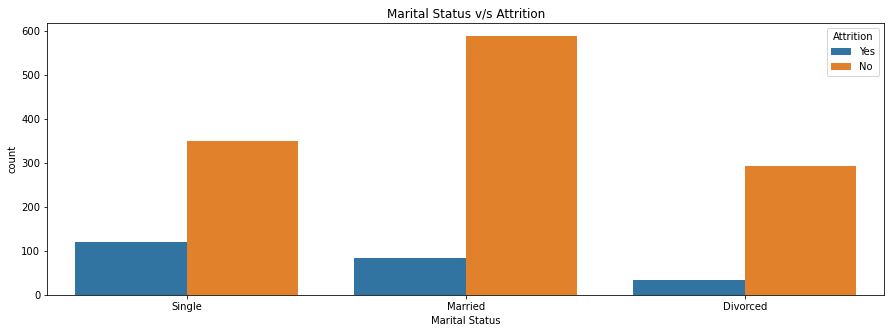

In [32]:
#Marital Status v/s Attrition

plt.figure(figsize=(15,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=data)
plt.title('Marital Status v/s Attrition')
plt.xlabel('Marital Status')

- We see that Married employees impacts high Attrition in the company

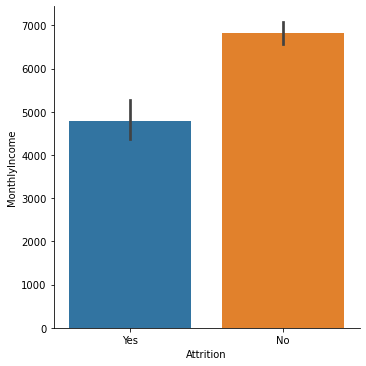

In [33]:
sns.factorplot(data=data,kind='bar',x='Attrition',y='MonthlyIncome')

- Employees with above "Rs.5000 Salary" are less likely to leave the company

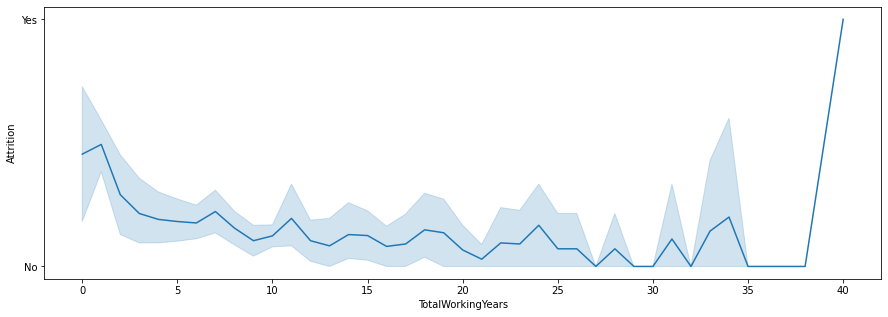

In [34]:
plt.figure(figsize=(15,5))
sns.lineplot(x='TotalWorkingYears',y='Attrition',data=data)
plt.show()

- We observe that possibility of the employees leaving the company is maximum between 0-3 years or after 35

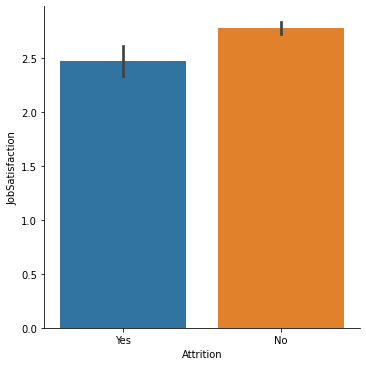

In [35]:
sns.factorplot(data=data,kind='bar',x='Attrition',y='JobSatisfaction')

- Employees with high job satisifaction are less interested to leave the company

<AxesSubplot:xlabel='Gender', ylabel='count'>

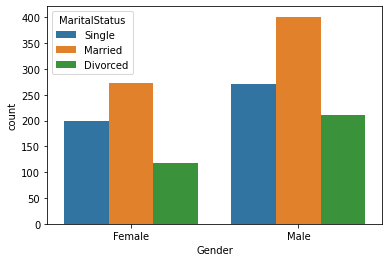

In [36]:
sns.countplot(data=data,x='Gender',hue='MaritalStatus')

- We observe that most of the employees (male and female) in the company are married

### Multivariate Analysis

<AxesSubplot:>

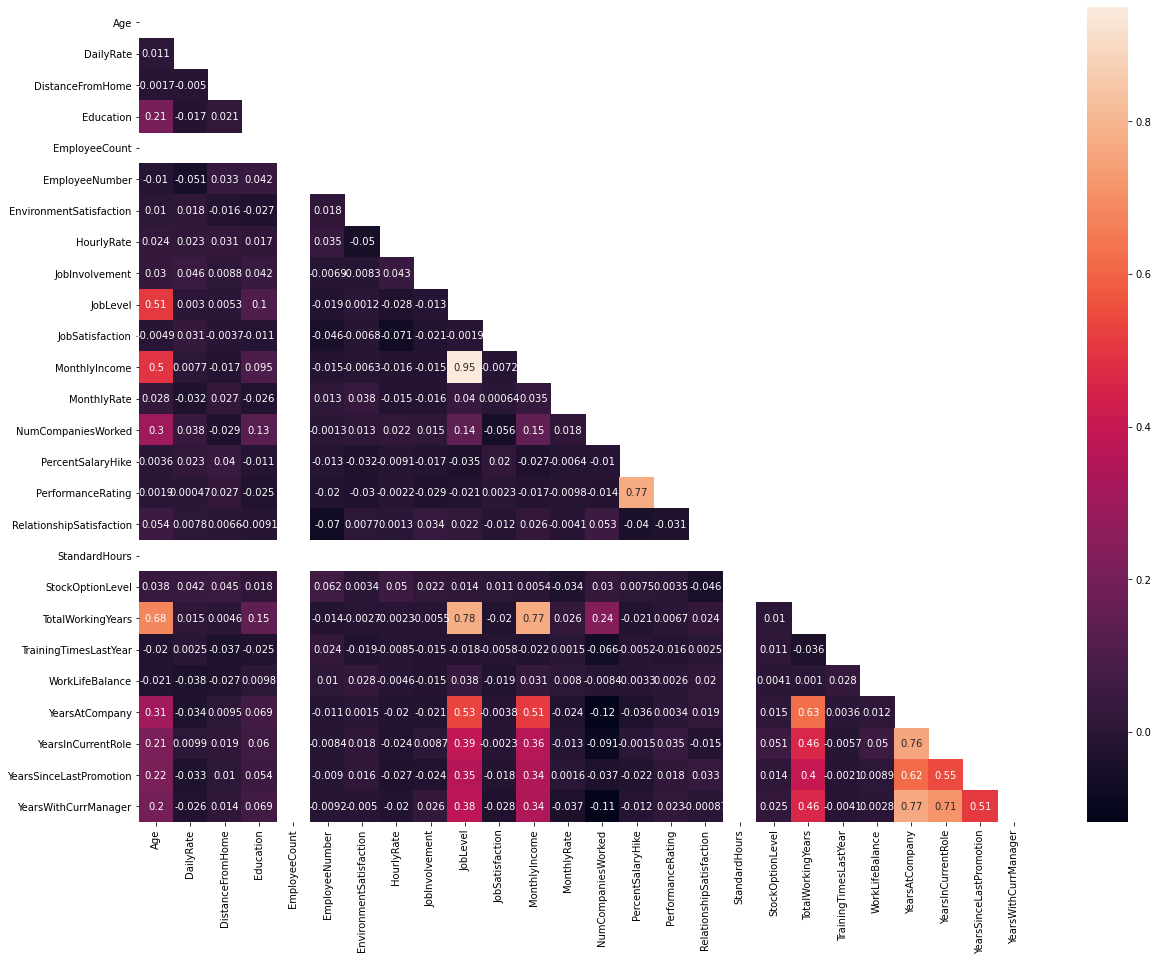

In [37]:
#correlation matrix
plt.figure(figsize=(20,15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

- As observed earlier, we have already confirmed to remove the following features 
    "EmployeeCount", "StandardHours" as it doesn't impact our dataset predictions
- Here, "Mothly Income" is highly correlated with "JobLevel"

## Removing Outliers and Skewness

In [38]:
# Outliers

data_outliers=data[['MonthlyIncome']]

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

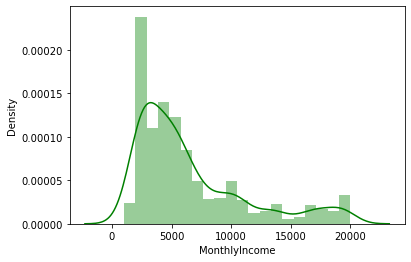

In [39]:
sns.distplot(data_outliers['MonthlyIncome'],color = 'Green')

- Let us apply some techniques to remove the outliers

#### Applying IQR Method

In [40]:
#Let's apply Inter Quartile Range technique

Q1 = data_outliers.quantile(0.25)
Q3 = data_outliers.quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data_outliers < (Q1-1.5*IQR)) | (data_outliers> (Q3 + 1.5*Q3))).any(axis = 1)]

In [41]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (1470, 35)
Shape After          : (1470, 35)
Percentage Loss      : 0.0


    After applying IQR Method, the Percentage of data loss is 0

#### Applying zscore Method

In [42]:
#Let's apply zscore technique

#importing libraries

from scipy.stats import zscore

In [43]:
z=np.abs(zscore(data_outliers))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [44]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (1470, 35)
Shape After          : (1470, 35)
Percentage Loss      : 0.0


    After applying zscore Method, the Percentage of data loss is 0% 

- Percentage of data loss is 0 by using zscore method and IQR method, the data size also remains the same, let's check for our skewness

In [217]:
df = data.copy()

### Skewness

In [218]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

- We see there are skewness in our Categorical Data as well, but we don't remove skewness on Categorical Data
- We can only remove skewness from "MonthlyIncome" column which is more than "0.5"

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

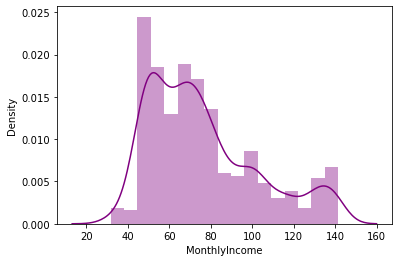

In [219]:
df['MonthlyIncome']=np.sqrt(df['MonthlyIncome'])
sns.distplot(df['MonthlyIncome'],color = 'Purple')

In [220]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [221]:
data = df.copy() #let's copy the above data

## Feature Selection

In [172]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [173]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [174]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [175]:
data = data.drop(columns = ['EmployeeCount','Over18','StandardHours','EmployeeNumber'])

## Feature Encoding

In [222]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
     if data[i].dtypes=='object':
            data[i]= le.fit_transform(data[i].values.reshape(-1,1))
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [223]:
data.dtypes

Age                           int64
Attrition                     int32
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                        int32
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [224]:
X = data.drop(columns = 'Attrition')
Y = data['Attrition']

In [179]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [225]:
# Handiling the class having imbalance using SMOTE

from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

### Scaling
- We could see that there is a huge difference in data range between different columns data in our dataset. Hence, we need to scale the data.

let's use StandardScaler method to normalize the data

In [226]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

### Finding Best Random State


Let's find out the best Random State which can be used for all our models

In [227]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.8744939271255061  with Random State  18


### Splitting train and test data

In [228]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20, random_state=maxAcc) 

y_train.sample(5)

1380    0
896     0
258     0
2355    1
621     0
Name: Attrition, dtype: int32

## MODEL BUILDING:

### Model: Logistic Regression

In [229]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train)
y_pred_log = Log_Reg.predict(x_test)

In [230]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred_log))
A1 = accuracy_score(y_test,y_pred_log)

Accuracy Score: 0.8744939271255061


In [231]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(Log_Reg,X_scaled,Y_over,cv=5))

print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean())
CV1 = cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.6194332  0.87221095 0.86409736 0.87221095 0.8296146 ]
Avg_Cross_Validation Score:  0.8115134145239835


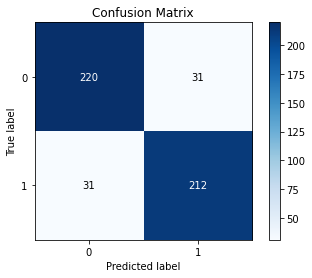

In [232]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log)
plt.show()

In [233]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       251
           1       0.87      0.87      0.87       243

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494



### Model2 : RandomForestClassifier

In [234]:

from sklearn.ensemble import RandomForestClassifier

Rand = RandomForestClassifier(random_state = 3)
Rand.fit(x_train,y_train)
y_pred_rand = Rand.predict(x_test)

In [235]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred_rand))
A2 = accuracy_score(y_test,y_pred_rand)

Accuracy Score: 0.9089068825910931


In [236]:
print("Cross Validation Score: ", cross_val_score(Rand,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(Rand,X_scaled,Y_over,cv=5).mean())
CV2 = cross_val_score(Rand,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.68016194 0.94929006 0.90466531 0.92089249 0.55172414]
Avg_Cross_Validation Score:  0.8013467902866858


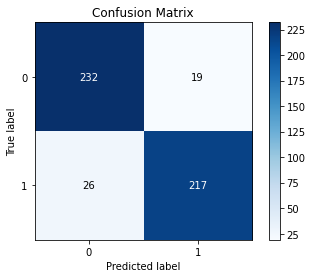

In [237]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rand)
plt.show()

In [238]:
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       251
           1       0.92      0.89      0.91       243

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



### Model3: DecisionTreeClassifier

In [239]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [240]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_dt))
A3 = accuracy_score(y_test,y_pred_dt)

Accuracy Score: 0.7732793522267206


In [241]:
print("Cross Validation Score: ", cross_val_score(dt,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(dt,X_scaled,Y_over,cv=5).mean())
CV3 = cross_val_score(dt,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.37449393 0.84584178 0.71805274 0.70182556 0.48884381]
Avg_Cross_Validation Score:  0.6193206921188132


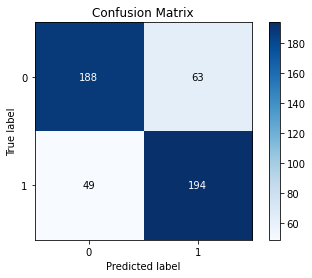

In [242]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt)
plt.show()

In [243]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       251
           1       0.75      0.80      0.78       243

    accuracy                           0.77       494
   macro avg       0.77      0.77      0.77       494
weighted avg       0.77      0.77      0.77       494



### Model4: KNeighbors Classifier

In [244]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [245]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred_knn))
A4 = accuracy_score(y_test,y_pred_knn)

Accuracy Score: 0.8481781376518218


In [246]:
print("Cross Validation Score: ", cross_val_score(knn,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(knn,X_scaled,Y_over,cv=5).mean())
CV4 = cross_val_score(knn,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.79959514 0.831643   0.8336714  0.81135903 0.82150101]
Avg_Cross_Validation Score:  0.8195539167782149


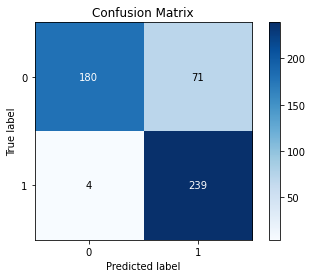

In [247]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_knn)
plt.show()

In [248]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       251
           1       0.77      0.98      0.86       243

    accuracy                           0.85       494
   macro avg       0.87      0.85      0.85       494
weighted avg       0.88      0.85      0.85       494



### Model5: AdaBoostClassifier

In [249]:

from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier(n_estimators=100,random_state=40,algorithm='SAMME')
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)

In [250]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_adb))
A5 = accuracy_score(y_test,y_pred_adb)

Accuracy Score: 0.8643724696356275


In [251]:
print("Cross Validation Score: ", cross_val_score(adb,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(adb,X_scaled,Y_over,cv=5).mean())
CV5 = cross_val_score(adb,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.41497976 0.72210953 0.63691684 0.68559838 0.48073022]
Avg_Cross_Validation Score:  0.5880669453318114


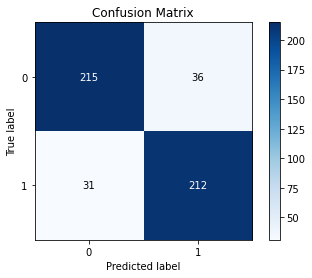

In [252]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_adb)
plt.show()

In [253]:
print(classification_report(y_test,y_pred_adb))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       251
           1       0.85      0.87      0.86       243

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494



### Model6: Support Vector classifcation

In [254]:
from sklearn.svm import SVC

sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)

In [255]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_sv))
A6 = accuracy_score(y_test,y_pred_sv)

Accuracy Score: 0.9068825910931174


In [256]:
print("Cross Validation Score: ", cross_val_score(sv,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(sv,X_scaled,Y_over,cv=5).mean())
CV6 = cross_val_score(sv,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.62550607 0.94117647 0.93509128 0.93509128 0.88235294]
Avg_Cross_Validation Score:  0.8638436080840265


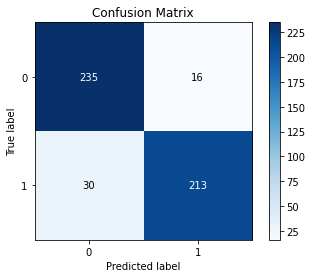

In [257]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_sv)
plt.show()

In [258]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       251
           1       0.93      0.88      0.90       243

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



##### Let's check our models overall score and select our model

In [259]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','Decision Tree','KNeighbors Classifier','AdaBoostClassifier','SVC'],'Accuracy_Score':[A1,A2,A3,A4,A5,A6],'Cross_Validation_Score':[CV1,CV2,CV3,CV4,CV5,CV6]})
Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [260]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.874494,0.811513,0.062981
1,Random Forest Classifier,0.908907,0.801347,0.107560
2,Decision Tree,0.773279,0.614451,0.158828
3,KNeighbors Classifier,0.848178,0.819554,0.028624
4,AdaBoostClassifier,0.864372,0.588067,0.276306
5,SVC,0.906883,0.863844,0.043039


In [261]:
Overall_Score['Difference'].min()

0.028624220873606943

In [262]:
Overall_Score[Overall_Score['Difference']==0.028624220873606943]

,Model,Accuracy_Score,Cross_Validation_Score,Difference
3,KNeighbors Classifier,0.848178,0.819554,0.028624


    Though, our Random Forest Classifier and SVC models gives us the best accuracy score, but we observe that the least 
    cv difference belongs to our 'KNeighbors Classifier' model
##### Hence, Our best model is 'KNeighbors Regressor'

## Hyper Parameter Tuning

In [263]:
#Importing library
from sklearn.model_selection import GridSearchCV

param_grid={'algorithm': ['kd_tree', 'brute'],'leaf_size': [15, 18, 20,25,30],'n_neighbors': [3, 5, 7, 13],
            'weights':['uniform', 'distance'],'metric':['euclidean','manhattan','minkowski','chebyshev']}

gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20, 25, 30],
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': [3, 5, 7, 13],
                         'weights': ['uniform', 'distance']})

In [264]:
print(gridsearch.best_score_, gridsearch.best_params_)

0.8727314785067147 {'algorithm': 'kd_tree', 'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [265]:
KNN = KNeighborsClassifier(algorithm='kd_tree',leaf_size=15,n_neighbors=3 ,weights = 'distance',metric = 'manhattan')
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

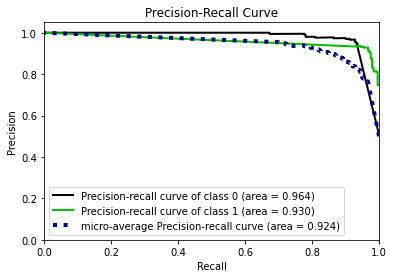

In [266]:

import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a knn classifier after tuning. We'll generate probabilities on the test set.
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()

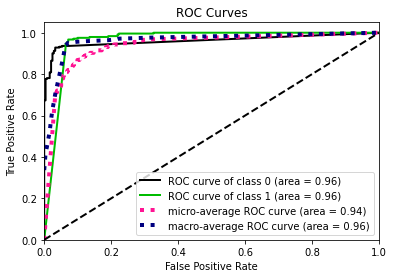

In [267]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a knn classifier. We'll generate probabilities on the test set.
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_roc(y_test, probas)

plt.show()

## Saving the model for future prediction:

In [271]:
import joblib
joblib.dump(KNN,'HR_Attrition_Prediction.obj')

['HR_Attrition_Prediction.obj']

### Performance Metrics

In [268]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Cross Validation Score: ", cross_val_score(KNN,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(KNN,X_scaled,Y_over,cv=5).mean())

Accuracy Score: 0.8825910931174089
Cross Validation Score:  [0.85020243 0.88235294 0.85192698 0.85801217 0.87626775]
Avg_Cross_Validation Score:  0.8637524533755985


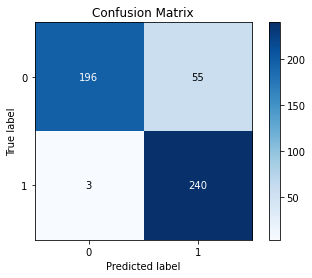

In [269]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [270]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       251
           1       0.81      0.99      0.89       243

    accuracy                           0.88       494
   macro avg       0.90      0.88      0.88       494
weighted avg       0.90      0.88      0.88       494



_________________________